## Public Visualizations

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
%matplotlib inline

In [19]:
df = pd.read_csv('data/artists.csv')
df.shape

(217, 6)

### Top Artists

In [20]:
df[(df.name == 'Diego Ríos') | (df.name == 'Chila Jatun')]

,artist_id,name,popularity,followers,genres,img_url
8,1IYPsxunWpJvDYA1Por8dI,Diego Ríos,41,15360,['cumbia boliviana'],https://i.scdn.co/image/2136977d295eebc7f071fa...
9,1pbcskpK1qePXm3sYvYu4o,Chila Jatun,42,15064,['andean'],https://i.scdn.co/image/dcfe2ab49d0de0c8a4cd3f...


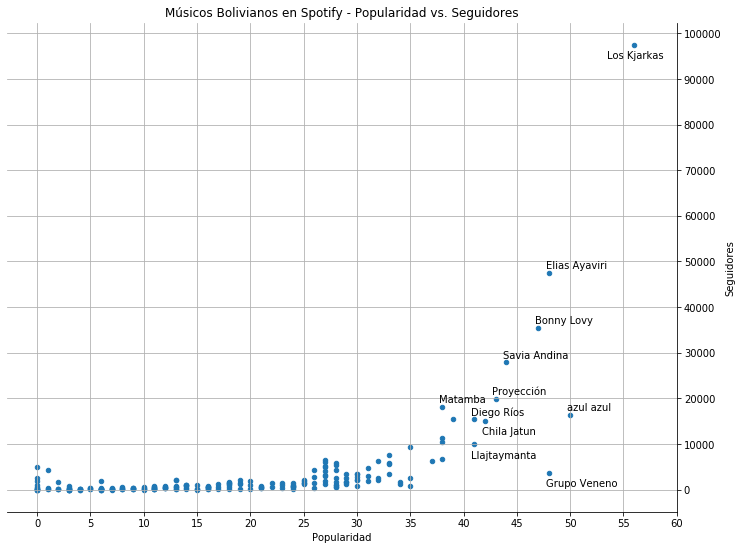

In [21]:
ax = df.plot.scatter(x='popularity', y='followers', figsize=(12,9))
ax.spines['left'].set_visible(False); ax.spines['top'].set_visible(False); plt.grid()
ax.set_title("Músicos Bolivianos en Spotify - Popularidad vs. Seguidores");
ax.set_xlabel('Popularidad'); ax.set_ylabel('Seguidores');
xticks = range(0,65,5); plt.xticks(xticks,xticks);
yticks = range(0,100000+10000,10000); plt.yticks(yticks,yticks)
ax.yaxis.tick_right(); ax.yaxis.set_label_position("right")

popularity_thrs = 40
followers_thrs = 18000
top_artists = df[(df.popularity >= popularity_thrs) | (df.followers >= followers_thrs)]

for i, row in top_artists.iterrows():
    name_len = len(row['name']) * 0.23
    x = row['popularity']
    y = row['followers'] + 1000
        
    if row['followers'] > 80000:
        x -= name_len
        y -= 4000
    else:
        x -= 0.3

    if row['followers'] < 15300:
        y -= 4000
    ax.annotate(row['name'], (x, y))#, rotation=15)
plt.savefig('plots/popularity-vs-followers-0620.png',dpi=100)

### Genre Distribution

In [32]:
df[df.genres.astype(str).str.contains('pop reggaeton')]

,artist_id,name,popularity,followers,genres,img_url
2,2oM7LqPaoCUcHHHnsTtgn1,Bonny Lovy,47,35377,"[cumbia boliviana, pop reggaeton]",https://i.scdn.co/image/782b72dd80898104191c44...


In [24]:
df.genres = df.genres.apply(literal_eval)
df.genres.explode().value_counts()

folklore boliviano    45
bolivian rock         42
andean                34
cumbia boliviana      29
indie boliviano       19
salay                 16
charango               9
hip hop boliviano      4
latin pop              2
reggae en espanol      2
bolivian metal         2
chamame                1
latintronica           1
andean flute           1
bolero                 1
latin metal            1
pop reggaeton          1
huayno                 1
Name: genres, dtype: int64

In [41]:
genre_translations = {
    'folklore boliviano': 'Folklore',
    'bolivian rock': 'Rock',
    'andean':       'Andina',
    'cumbia boliviana':  'Cumbia',
    'indie boliviano':  'Indie',
    'salay':  'Salay',
    'charango': 'Charango',
    'hip hop boliviano': 'Hip Hop',
    'latin pop': 'Latin Pop',
    'reggae en espanol': 'Reggae',
    'bolivian metal':  'Metal', 
    'chamame': 'Chamamé',
    'latintronica': 'Latintrónica',
    'andean flute': 'Andina',
    'bolero': 'Bolero',
    'latin metal': 'Metal',
    'pop reggaeton': 'Pop Reggaeton',
    'huayno':  'Huayño'
}

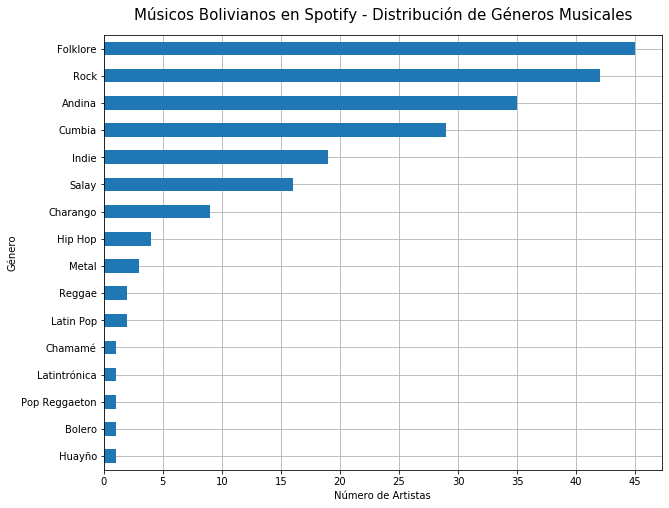

In [68]:
def plot_genre_dist(df, translations):
    exploded = df.genres.explode().map(translations)

    ax = exploded.value_counts(dropna=True).sort_values(ascending=True).plot.barh(figsize=(10,8))

    ax.set_title('Músicos Bolivianos en Spotify - Distribución de Géneros Musicales', fontsize=15, pad=15);
    ax.set_xlabel('Número de Artistas'); ax.set_ylabel('Género');
    ax.set_axisbelow(True); plt.grid();
    xticks = np.arange(0,50,5)
    plt.xticks(xticks, xticks)
    plt.savefig('plots/genres-distribution.png', dpi=100, bbox_inches='tight')
plot_genre_dist(df, genre_translations)